## Importing Libraries

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [14]:
data=pd.read_csv("C:\\Users\\sehga\\Downloads\\har.csv")

## Data Preprocessing

In [16]:
data.shape

(7352, 563)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [18]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [19]:
data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [20]:
data.duplicated().sum()

0

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

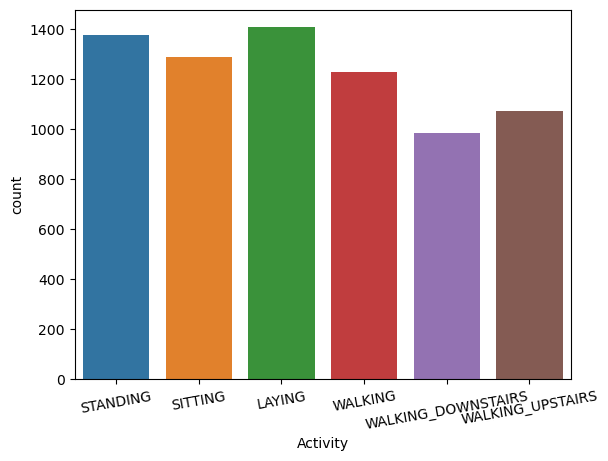

In [26]:
sns.countplot(x=data['Activity'])
plt.xticks(rotation=10)

In [30]:
x=data.iloc[:, :-2].values
y=data.iloc[:,-1].values

In [32]:
x

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

In [33]:
y

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

## Feature Encoding for y

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [37]:
y

array([2, 2, 2, ..., 5, 5, 5])

## Splitting the dataset into training and testing set

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Feature Selection with Filter Method

In [28]:
from sklearn.feature_selection import SelectKBest,f_classif

In [43]:
selector=SelectKBest(f_classif,k=200)
x_train_sel=selector.fit_transform(x_train,y_train)
x_test_sel=selector.transform(x_test)
sel_indices=selector.get_support(indices=True)
selected_features=data.columns[sel_indices]
print(len(selected_features))

200


## Importing Various  Classification Models 

In [55]:
pip install xgboost

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Importing classification metrics and Grid Search 

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [94]:
parameters={'C':[20,30,40,50],'penalty':['l1','l2']}
log_reg=LogisticRegression()
log_reg_grid=GridSearchCV(log_reg,param_grid=parameters,n_jobs=-1,verbose=1)
log_reg_grid.fit(x_train_sel,y_train)
best_log_reg=log_reg_grid.best_estimator_
y_pred=best_log_reg.predict(x_test_sel)

acc=print('accuracy:',accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\sehga\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sehga\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sehga\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\sehga\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _

accuracy: 0.9721278042148198


C:\Users\sehga\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
confusion_matrix(y_test,y_pred)

array([[285,   0,   0,   0,   0,   0],
       [  0, 258,  17,   0,   0,   0],
       [  0,  16, 262,   0,   0,   0],
       [  0,   0,   0, 240,   0,   4],
       [  0,   0,   0,   1, 194,   1],
       [  0,   0,   1,   1,   0, 191]], dtype=int64)

## Linear SVC

In [87]:
parameters={'C':[0.25,0.5,0.75,1,2,4]}
lin_svc=LinearSVC()
lin_svc_grid=GridSearchCV(lin_svc,param_grid=parameters,verbose=1,n_jobs=-1)
lin_svc_grid.fit(x_train_sel,y_train)
best_lin_svc=lin_svc_grid.best_estimator_
y_pred=best_lin_svc.predict(x_test_sel)
acc=print('accuracy:',accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\sehga\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy: 0.9775662814411965


C:\Users\sehga\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [88]:
confusion_matrix(y_test,y_pred)

array([[285,   0,   0,   0,   0,   0],
       [  0, 255,  20,   0,   0,   0],
       [  0,  12, 266,   0,   0,   0],
       [  0,   0,   0, 243,   0,   1],
       [  0,   0,   0,   0, 196,   0],
       [  0,   0,   0,   0,   0, 193]], dtype=int64)

## Kernel SVM

In [97]:
parameters={'C':[0.125,0.25,0.5,1],'gamma':[0.01,0.1,1,2]}
kern_svm=SVC(kernel='rbf')
kern_svm_grid=GridSearchCV(kern_svm,param_grid=parameters,verbose=1,n_jobs=-1)
kern_svm_grid.fit(x_train_sel,y_train)
kern_svm_grid_best=kern_svm_grid.best_estimator_
y_pred=kern_svm_grid_best.predict(x_test_sel)
acc=print('accuracy:',accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
accuracy: 0.9741672331747111


In [98]:
confusion_matrix(y_test,y_pred)

array([[285,   0,   0,   0,   0,   0],
       [  0, 254,  21,   0,   0,   0],
       [  0,  16, 262,   0,   0,   0],
       [  0,   0,   0, 244,   0,   0],
       [  0,   0,   0,   0, 196,   0],
       [  0,   0,   0,   1,   0, 192]], dtype=int64)

## Decision Tree Classification

In [100]:
parameters={'max_depth':np.arange(4,10,1)}
dtree=DecisionTreeClassifier()
dtree_grid=GridSearchCV(dtree,param_grid=parameters,verbose=1,n_jobs=-1)
dtree_grid.fit(x_train_sel,y_train)
dtree_grid_best=dtree_grid.best_estimator_
y_pred=dtree_grid_best.predict(x_test_sel)
acc=print('accuracy:',accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
accuracy: 0.9347382732834806


In [104]:
confusion_matrix(y_test,y_pred)

array([[285,   0,   0,   0,   0,   0],
       [  0, 245,  30,   0,   0,   0],
       [  0,  15, 263,   0,   0,   0],
       [  0,   0,   0, 221,  10,  13],
       [  0,   0,   0,   5, 180,  11],
       [  0,   0,   0,   6,   6, 181]], dtype=int64)

## Random Forest Classifier

In [114]:
parameters={'n_estimators':np.arange(10,201,20),'max_depth':np.arange(4,15,2)}
rfc=RandomForestClassifier()
rfc_grid=GridSearchCV(rfc,param_grid=parameters,verbose=1,n_jobs=-1)
rfc_grid.fit(x_train_sel,y_train)
rfc_grid_best=rfc_grid.best_estimator_
y_pred=rfc_grid_best.predict(x_test_sel)
acc=print('accuracy:',accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
accuracy: 0.9809653297076818


In [117]:
confusion_matrix(y_test,y_pred)

array([[285,   0,   0,   0,   0,   0],
       [  0, 262,  13,   0,   0,   0],
       [  0,   8, 270,   0,   0,   0],
       [  0,   0,   0, 242,   0,   2],
       [  0,   0,   0,   3, 192,   1],
       [  0,   0,   0,   0,   1, 192]], dtype=int64)

## XGBClassifier

In [108]:
parameters={'n_estimators':np.arange(120,150,10),'max_depth':np.arange(3,7,1)}
xgb=XGBClassifier()
xgb_grid=GridSearchCV(xgb,param_grid=parameters,verbose=1,n_jobs=-1)
xgb_grid.fit(x_train_sel,y_train)
xgb_grid_best=xgb_grid.best_estimator_
y_pred=xgb_grid_best.predict(x_test_sel)
acc=print('accuracy:',accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
accuracy: 0.990482664853841


In [113]:
confusion_matrix(y_test,y_pred)

array([[285,   0,   0,   0,   0,   0],
       [  0, 266,   9,   0,   0,   0],
       [  0,   3, 275,   0,   0,   0],
       [  0,   0,   0, 244,   0,   0],
       [  0,   0,   0,   1, 194,   1],
       [  0,   0,   0,   0,   0, 193]], dtype=int64)